# Кластеризация

## Импорты

In [1]:
from dataclasses import dataclass
from enum import Enum
from typing import Callable

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import (
    adjusted_rand_score,
    davies_bouldin_score,
    mutual_info_score,
    silhouette_score,
)

In [2]:
# Импорт модулей из другого ноутбука

%run -i kmeans.ipynb

## Задание 1

#### Генерация датасетов

In [3]:
X_1, y_1 = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)

In [4]:
X_2, y_2 = make_blobs(n_samples=250, centers=3, n_features=2, random_state=1)

In [5]:
X_3, y_3 = make_blobs(n_samples=500, centers=3, n_features=2, random_state=2)

In [6]:
type Data = list[tuple[list[list], list[int]]]

In [7]:
data: Data = [(X_1, y_1), (X_2, y_2), (X_3, y_3)]

In [8]:
names = ["Датасет 1", "Датасет 2", "Датасет 3"]

#### Визуализация данных

In [9]:
def data_visualization(data: Data, names: list[str], title: str) -> None:
    fig = make_subplots(rows=1, cols=len(data))

    for i, (X, y) in enumerate(data):
        fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode="markers", name=names[i], text=y), row=1, col=i + 1)

    fig.update_layout(height=480, width=1280, title_text=title)

    fig.show()

In [10]:
data_visualization(data, names, "Визуализация сгенерированных датасетов")

#### Кластеризация

In [11]:
# Список методов кластеризации

class Method(Enum):
    KMEANS = "K MEANS"
    DBSCAN = "DBSCAN"
    CUSTOM_KMEANS = "CUSTOM K MEANS"

In [12]:
# Класс гиперпараметра для оптимизации

@dataclass
class Hyper:
    name: str
    value: list[int]

In [13]:
# Класс для сбора метрик кластеризации

@dataclass
class Metrics:
    ari: float
    ss: float
    dbs: float
    mis: float

In [14]:
# Функция получения метрик кластеризации

def get_metrics(X: list[list], y: list[int], y_pred: list[int]) -> Metrics:
    # Внутренние метрики
    ari = adjusted_rand_score(y, y_pred)
    ss = silhouette_score(X, y_pred)

    # Внешние метрики
    dbs = davies_bouldin_score(X, y_pred)
    mis = mutual_info_score(y, y_pred)

    print(f"[+] Мера сходства (ARI): {ari:.4f}")
    print(f"[+] Коэффициент силуэта: {ss:.4f}")
    print(f"[+] Оценка Дэвиса-Булдина: {dbs:.4f}")
    print(f"[+] Мера сходства (MIS): {mis:.4f}")

    return Metrics(ari, ss, dbs, mis)

In [15]:
# Функция-оптимизатор кластеризатора KMeans

def run_kmeans(X: list[list], y: list[int], clusters_range: Hyper) -> None:
    predicted_data = []

    for n in range(clusters_range.value[0], clusters_range.value[1]):
        print(f"[+] {clusters_range.name}: {n}")

        kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
        metrics = get_metrics(X, y, kmeans.labels_)
        predicted_data.append((X[:], kmeans.labels_[:]))

        print()

    return predicted_data

In [16]:
# Функция-оптимизатор кластеризатора DBSCAN

def run_dbscan(X: list[list], y: list[int], min_samples: Hyper) -> Data:
    predicted_data = []

    for min_sample in min_samples.value:
        print(f"[+] {min_samples.name}: {min_sample}")

        dbscan = DBSCAN(min_samples=min_sample).fit(X)
        metrics = get_metrics(X, y, dbscan.labels_)
        predicted_data.append((X[:], dbscan.labels_[:]))

        print()

    return predicted_data

In [17]:
# Функция-оптимизатор самописного кластеризатора KMeans

def run_custom_kmeans(X: list[list], y: list[int], clusters_range: Hyper) -> None:
    predicted_data = []

    for n in range(clusters_range.value[0], clusters_range.value[1]):
        print(f"[+] {clusters_range.name}: {n}")

        custom_kmeans = CustomKMeans(n_clusters=n).fit(X)
        metrics = get_metrics(X, y, custom_kmeans.labels_)
        predicted_data.append((X[:], custom_kmeans.labels_[:]))

        print()

    return predicted_data

In [18]:
# Функция для запуска кластеризации на разных датасетах с подбором гиперпараметра

def run_experiment(
    data: Data,
    method: Method,
    runner: Callable,
    hyper: Hyper,
) -> None:
    print(f"==============================", end="\n\n")
    print(f"[>>>] {method.value}", end="\n\n")

    for i, (X, y) in enumerate(data):
        print(f"==============================", end="\n\n")
        print(f"[+] Кластеризация датасета {i + 1}", end="\n\n")
        predicted_data = runner(X, y, hyper)
        data_visualization(predicted_data, names, hyper.name)
        print()


[>>>] K MEANS


[+] Кластеризация датасета 1

[+] Количество кластеров: 2
[+] Мера сходства (ARI): 0.3914
[+] Коэффициент силуэта: 0.3793
[+] Оценка Дэвиса-Булдина: 1.0004
[+] Мера сходства (MIS): 0.3954

[+] Количество кластеров: 3
[+] Мера сходства (ARI): 0.7201
[+] Коэффициент силуэта: 0.4429
[+] Оценка Дэвиса-Булдина: 0.7728
[+] Мера сходства (MIS): 0.7485

[+] Количество кластеров: 4
[+] Мера сходства (ARI): 0.5786
[+] Коэффициент силуэта: 0.4021
[+] Оценка Дэвиса-Булдина: 0.8936
[+] Мера сходства (MIS): 0.7025



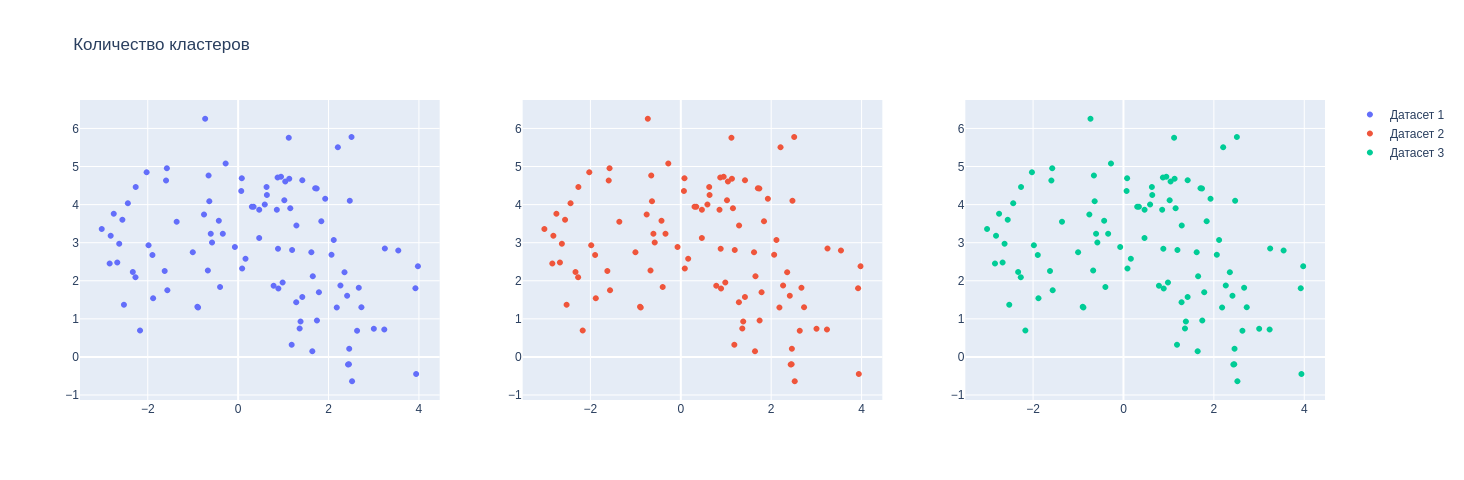



[+] Кластеризация датасета 2

[+] Количество кластеров: 2
[+] Мера сходства (ARI): 0.5724
[+] Коэффициент силуэта: 0.7734
[+] Оценка Дэвиса-Булдина: 0.3053
[+] Мера сходства (MIS): 0.6383

[+] Количество кластеров: 3
[+] Мера сходства (ARI): 1.0000
[+] Коэффициент силуэта: 0.7139
[+] Оценка Дэвиса-Булдина: 0.4094
[+] Мера сходства (MIS): 1.0986

[+] Количество кластеров: 4
[+] Мера сходства (ARI): 0.8600
[+] Коэффициент силуэта: 0.5896
[+] Оценка Дэвиса-Булдина: 0.7999
[+] Мера сходства (MIS): 1.0795



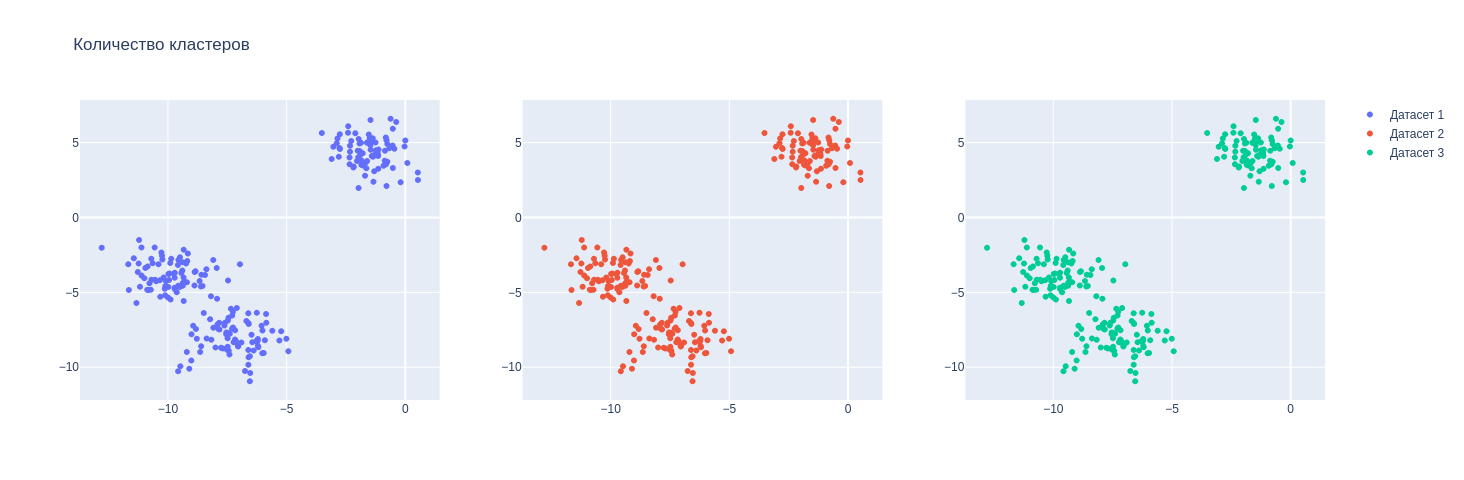



[+] Кластеризация датасета 3

[+] Количество кластеров: 2
[+] Мера сходства (ARI): 0.5683
[+] Коэффициент силуэта: 0.6570
[+] Оценка Дэвиса-Булдина: 0.4670
[+] Мера сходства (MIS): 0.6261

[+] Количество кластеров: 3
[+] Мера сходства (ARI): 0.9188
[+] Коэффициент силуэта: 0.5860
[+] Оценка Дэвиса-Булдина: 0.5904
[+] Мера сходства (MIS): 0.9766

[+] Количество кластеров: 4
[+] Мера сходства (ARI): 0.7856
[+] Коэффициент силуэта: 0.4525
[+] Оценка Дэвиса-Булдина: 0.9805
[+] Мера сходства (MIS): 0.9825



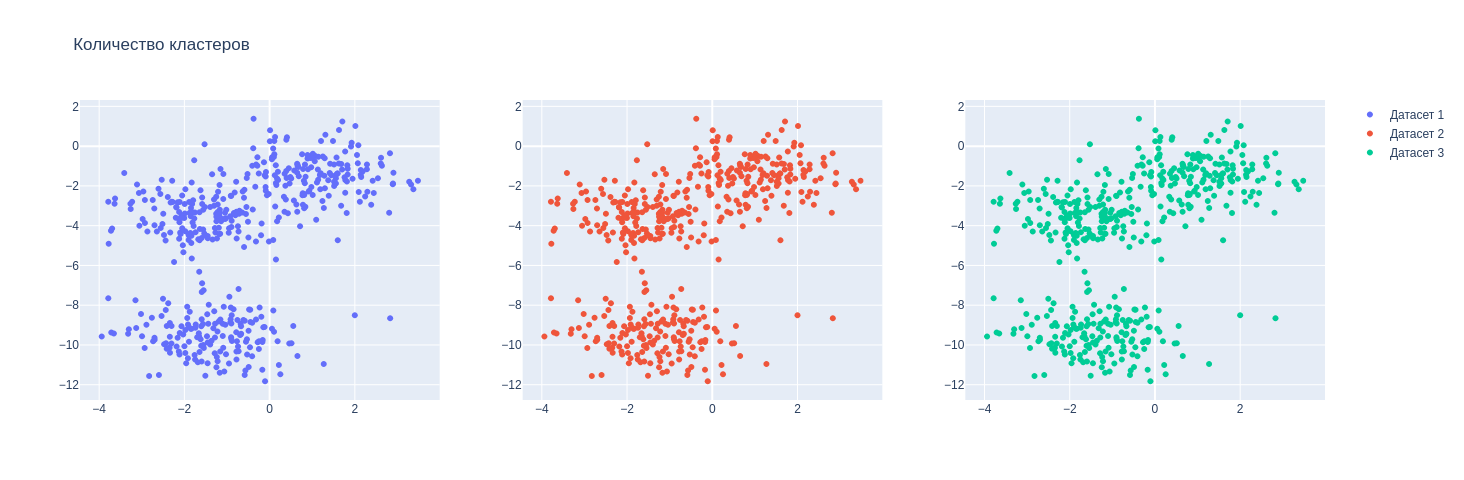

In [19]:
# Эксперимент с KMeans

run_experiment(
    data,
    Method.KMEANS,
    run_kmeans,
    Hyper(name="Количество кластеров", value=[2, 5])
)


[>>>] DBSCAN


[+] Кластеризация датасета 1

[+] Количество учитываемых соседей: 2
[+] Мера сходства (ARI): 0.2015
[+] Коэффициент силуэта: 0.1905
[+] Оценка Дэвиса-Булдина: 1.6720
[+] Мера сходства (MIS): 0.7428

[+] Количество учитываемых соседей: 4
[+] Мера сходства (ARI): 0.1300
[+] Коэффициент силуэта: 0.0347
[+] Оценка Дэвиса-Булдина: 1.1676
[+] Мера сходства (MIS): 0.4869

[+] Количество учитываемых соседей: 8
[+] Мера сходства (ARI): 0.0068
[+] Коэффициент силуэта: -0.1229
[+] Оценка Дэвиса-Булдина: 1.9112
[+] Мера сходства (MIS): 0.0449



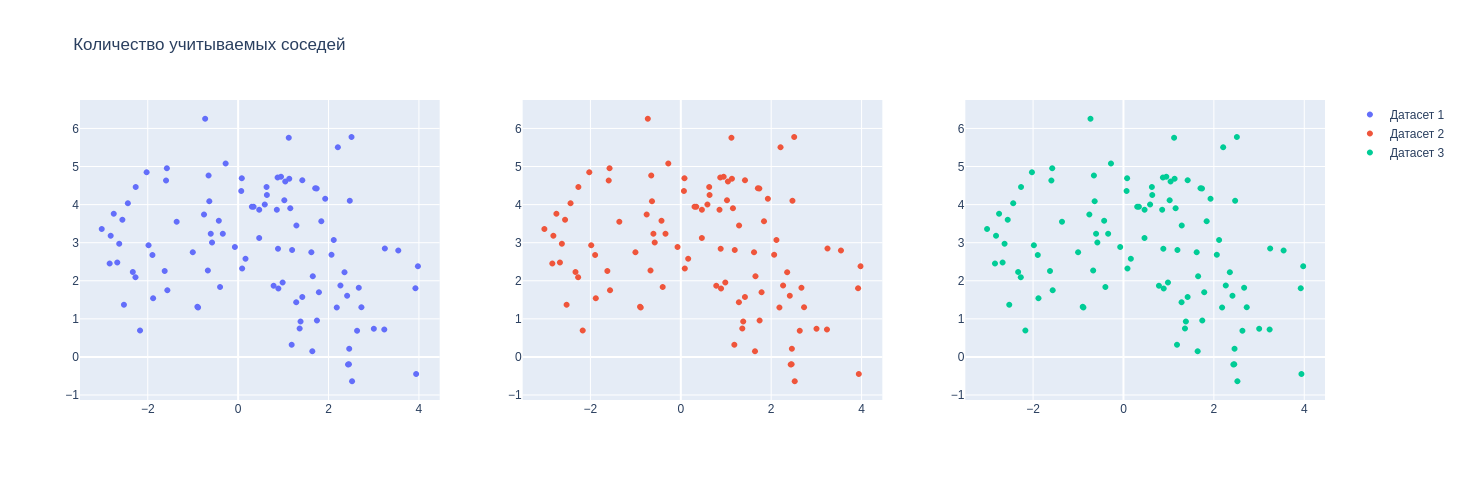



[+] Кластеризация датасета 2

[+] Количество учитываемых соседей: 2
[+] Мера сходства (ARI): 0.6914
[+] Коэффициент силуэта: 0.1824
[+] Оценка Дэвиса-Булдина: 1.1898
[+] Мера сходства (MIS): 1.0147

[+] Количество учитываемых соседей: 4
[+] Мера сходства (ARI): 0.6495
[+] Коэффициент силуэта: 0.2803
[+] Оценка Дэвиса-Булдина: 1.3330
[+] Мера сходства (MIS): 0.8760

[+] Количество учитываемых соседей: 8
[+] Мера сходства (ARI): 0.2795
[+] Коэффициент силуэта: 0.0241
[+] Оценка Дэвиса-Булдина: 1.4813
[+] Мера сходства (MIS): 0.6495



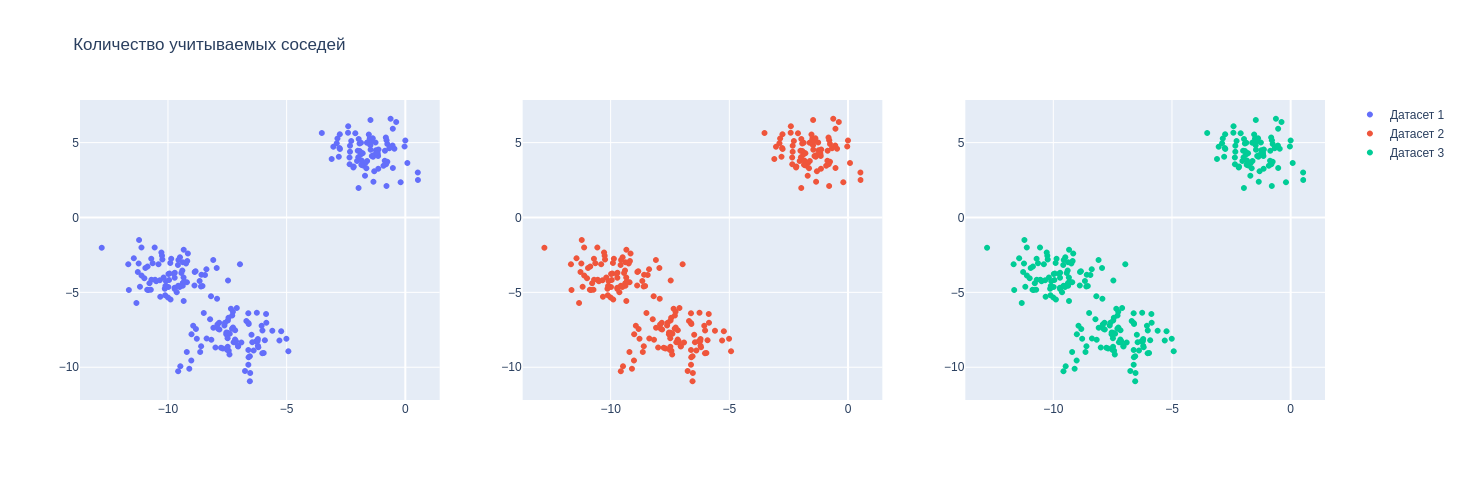



[+] Кластеризация датасета 3

[+] Количество учитываемых соседей: 2
[+] Мера сходства (ARI): 0.5156
[+] Коэффициент силуэта: 0.1590
[+] Оценка Дэвиса-Булдина: 1.6644
[+] Мера сходства (MIS): 0.6139

[+] Количество учитываемых соседей: 4
[+] Мера сходства (ARI): 0.5086
[+] Коэффициент силуэта: 0.3529
[+] Оценка Дэвиса-Булдина: 1.5154
[+] Мера сходства (MIS): 0.5983

[+] Количество учитываемых соседей: 8
[+] Мера сходства (ARI): 0.6700
[+] Коэффициент силуэта: 0.4228
[+] Оценка Дэвиса-Булдина: 2.1568
[+] Мера сходства (MIS): 0.8234



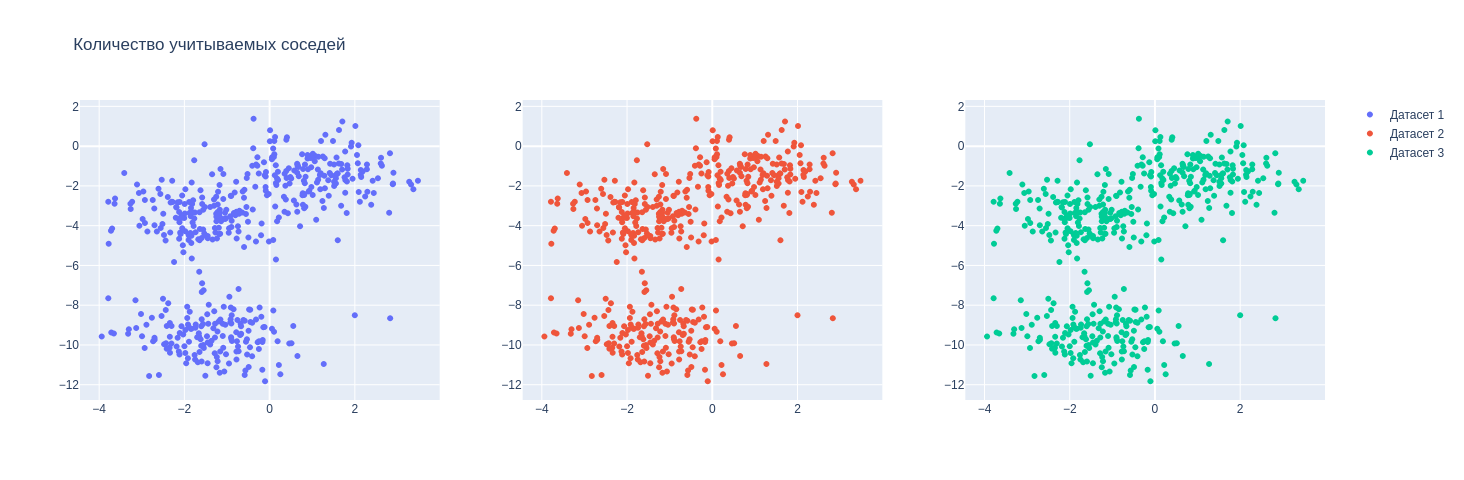

In [20]:
# Эксперимент с DBSCAN

run_experiment(
    data,
    Method.DBSCAN,
    run_dbscan,
    Hyper(name="Количество учитываемых соседей", value=[2, 4, 8])
)


[>>>] CUSTOM K MEANS


[+] Кластеризация датасета 1

[+] Количество кластеров: 2
[+] Мера сходства (ARI): 0.3914
[+] Коэффициент силуэта: 0.3793
[+] Оценка Дэвиса-Булдина: 1.0004
[+] Мера сходства (MIS): 0.3954

[+] Количество кластеров: 3
[+] Мера сходства (ARI): 0.7251
[+] Коэффициент силуэта: 0.4482
[+] Оценка Дэвиса-Булдина: 0.7550
[+] Мера сходства (MIS): 0.7607

[+] Количество кластеров: 4
[+] Мера сходства (ARI): 0.5747
[+] Коэффициент силуэта: 0.3786
[+] Оценка Дэвиса-Булдина: 0.9434
[+] Мера сходства (MIS): 0.7537



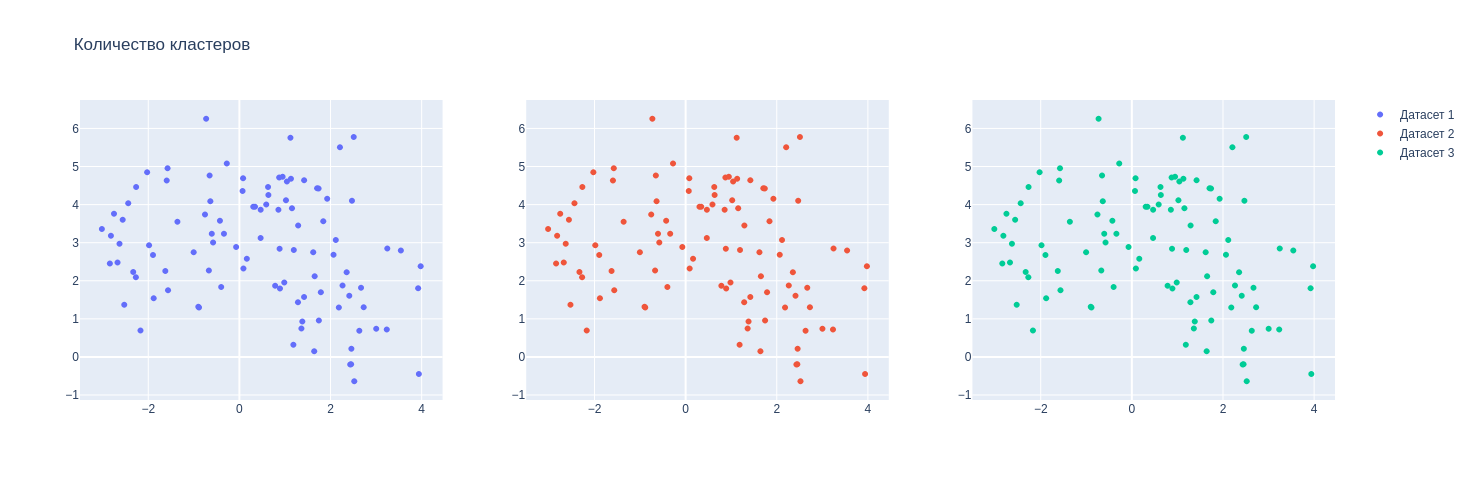



[+] Кластеризация датасета 2

[+] Количество кластеров: 2
[+] Мера сходства (ARI): 0.5724
[+] Коэффициент силуэта: 0.7734
[+] Оценка Дэвиса-Булдина: 0.3053
[+] Мера сходства (MIS): 0.6383

[+] Количество кластеров: 3
[+] Мера сходства (ARI): 0.4429
[+] Коэффициент силуэта: 0.5596
[+] Оценка Дэвиса-Булдина: 1.0632
[+] Мера сходства (MIS): 0.6383

[+] Количество кластеров: 4
[+] Мера сходства (ARI): 0.8600
[+] Коэффициент силуэта: 0.5896
[+] Оценка Дэвиса-Булдина: 0.7999
[+] Мера сходства (MIS): 1.0795



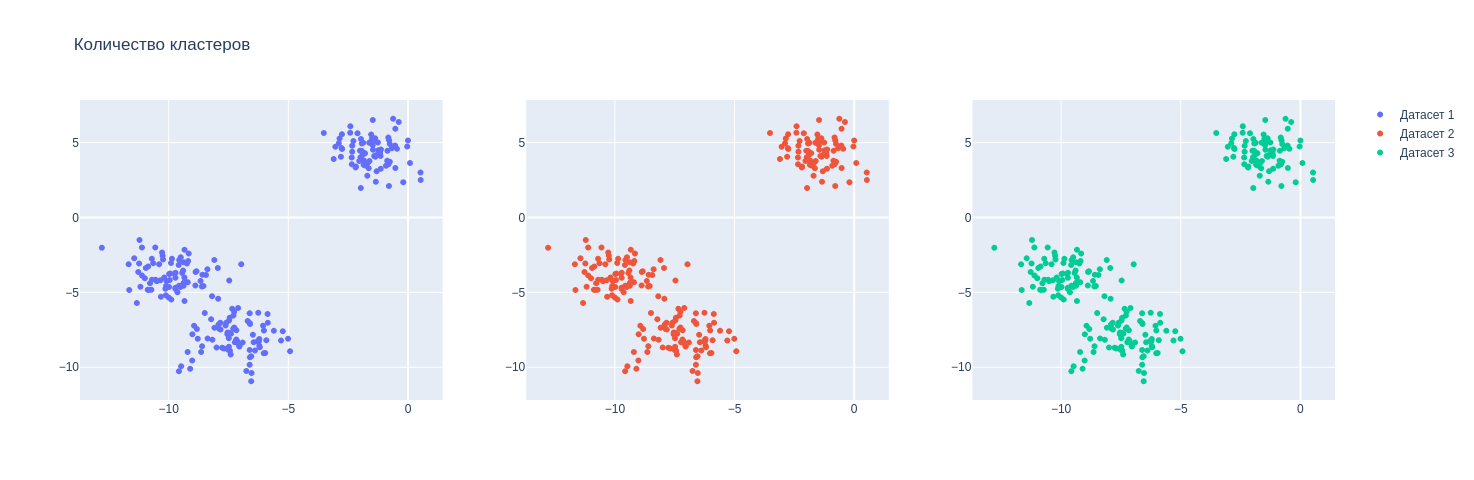



[+] Кластеризация датасета 3

[+] Количество кластеров: 2
[+] Мера сходства (ARI): 0.5683
[+] Коэффициент силуэта: 0.6570
[+] Оценка Дэвиса-Булдина: 0.4670
[+] Мера сходства (MIS): 0.6261

[+] Количество кластеров: 3
[+] Мера сходства (ARI): 0.9133
[+] Коэффициент силуэта: 0.5860
[+] Оценка Дэвиса-Булдина: 0.5907
[+] Мера сходства (MIS): 0.9702

[+] Количество кластеров: 4
[+] Мера сходства (ARI): 0.7907
[+] Коэффициент силуэта: 0.4875
[+] Оценка Дэвиса-Булдина: 0.9074
[+] Мера сходства (MIS): 0.9813



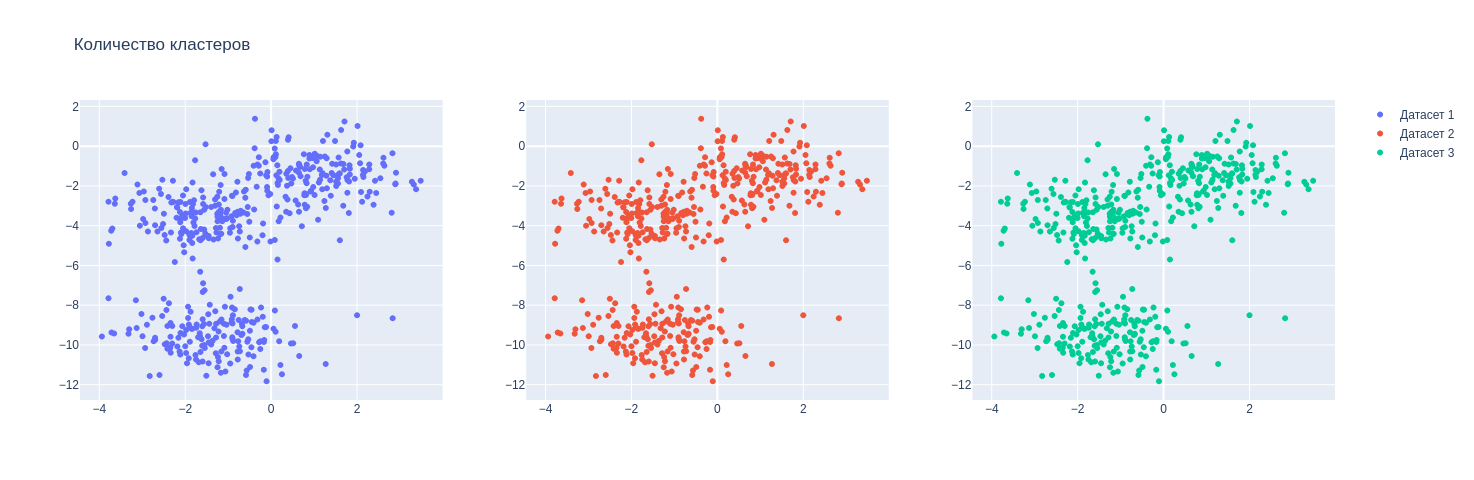

In [21]:
# Эксперимент с самописным KMeans

run_experiment(
    data,
    Method.CUSTOM_KMEANS,
    run_custom_kmeans,
    Hyper(name="Количество кластеров", value=[2, 5])
)